# **Logistic Regression**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import random
from sklearn.metrics import confusion_matrix

In [10]:
def univariate_gaussian_generator(mu, sigma):
    # Generate two independent uniform random numbers
    U1, U2 = np.random.uniform(0, 1, 2)
    
    
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    
    X = mu + sigma * Z0
    return X

In [11]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression cost gradient
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1 / m) * (X.T @ (h - y))

# Logistic regression Hessian matrix
def compute_hessian(theta, X):
    m = X.shape[0]
    h = sigmoid(X @ theta)
    diag = np.diag(h * (1 - h))
    return (1 / m) * (X.T @ diag @ X)

# Gradient Descent optimization
def gradient_descent(theta, X, y, alpha=0.00001, max_iter=1000000, tol=1e-9):
    for i in range(max_iter):
        gradient = compute_gradient(theta, X, y)
        theta = theta - alpha * gradient
        if np.all(np.abs(gradient) < tol):
            break
    return theta

# Newton's method optimization
def newtons_method(theta, X, y, max_iter=100, tol=1e-6):
    for i in range(max_iter):
        gradient = compute_gradient(theta, X, y)
        hessian = compute_hessian(theta, X)
        if np.linalg.det(hessian) == 0:  
            print("Switching to gradient descent")
            return gradient_descent(theta, X, y)
        delta = np.linalg.solve(hessian, gradient)
        theta = theta - delta
        if np.all(np.abs(delta) < tol):
            break
    return theta

In [12]:
# Logistic Regression function
def logisticRegression(N, mx1,vx1, my1, vy1, mx2, vx2, my2, vy2):
    # Step 1: Generate data points for D1 and D2
    D1 = [(univariate_gaussian_generator(mx1, vx1), univariate_gaussian_generator(my1, vy1)) for _ in range(N)]
    D2 = [(univariate_gaussian_generator(mx2, vx2), univariate_gaussian_generator(my2, vy2)) for _ in range(N)]
    
    # Prepare dataset and labels
    X = np.array(D1 + D2)
    y = np.array([0] * N + [1] * N)  
    
    
    X = np.hstack((np.ones((2 * N, 1)), X))
    
    # Initial theta
    theta_init = np.zeros(X.shape[1])
    
    # Logistic Regression with Newton's method and gradient descent as fallback
    theta_newton = newtons_method(theta_init, X, y)
    theta_gd = gradient_descent(theta_init, X, y)
    
    # Calculate confusion matrix, sensitivity, and specificity
    def evaluate(theta):
        predictions = (sigmoid(X @ theta) >= 0.5).astype(int)
        TP = np.sum((predictions == 1) & (y == 1))
        TN = np.sum((predictions == 0) & (y == 0))
        FP = np.sum((predictions == 1) & (y == 0))
        FN = np.sum((predictions == 0) & (y == 1))
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        return np.array([[TP, FN], [FP, TN]]), sensitivity, specificity
    
    cm_newton, sens_newton, spec_newton = evaluate(theta_newton)
    cm_gd, sens_gd, spec_gd = evaluate(theta_gd)
    
    # Visualization
    plt.figure(figsize=(18, 6))
    
    # Plot ground truth
    plt.subplot(1, 3, 1)
    plt.scatter(*zip(*D1), color='blue', label="Class 0 (D1)")
    plt.scatter(*zip(*D2), color='red', label="Class 1 (D2)")
    plt.legend()
    plt.title("Ground Truth")
    
    # Plot predictions for Newton's method
    plt.subplot(1, 3, 2)
    plt.scatter(*zip(*D1), color='blue', label="Class 0 (D1)")
    plt.scatter(*zip(*D2), color='red', label="Class 1 (D2)")
    x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_values_newton = -(theta_newton[0] + theta_newton[1] * x_values) / theta_newton[2]
    plt.plot(x_values, y_values_newton, 'k--', label="Decision Boundary (Newton)")
    plt.legend()
    plt.title("Newton's Method Decision Boundary")
    
    # Plot predictions for Gradient Descent
    plt.subplot(1, 3, 3)
    plt.scatter(*zip(*D1), color='blue', label="Class 0 (D1)")
    plt.scatter(*zip(*D2), color='red', label="Class 1 (D2)")
    y_values_gd = -(theta_gd[0] + theta_gd[1] * x_values) / theta_gd[2]
    plt.plot(x_values, y_values_gd, 'g--', label="Decision Boundary (Gradient Descent)")
    plt.legend()
    plt.title("Gradient Descent Decision Boundary")
    
    plt.tight_layout()
    plt.show()
    
    # Output the confusion matrices, sensitivity, specificity, and weights
    print("Confusion Matrix (Newton's Method):\n", cm_newton)
    print("Sensitivity:", sens_newton, "Specificity:", spec_newton)
    print("\nConfusion Matrix (Gradient Descent):\n", cm_gd)
    print("Sensitivity:", sens_gd, "Specificity:", spec_gd)
    
    # Display final weight values
    print("\nFinal Weights using Newton's Method:")
    for i, weight in enumerate(theta_newton):
        print(f"θ{i} = {weight:.10f}")
    
    print("\nFinal Weights using Gradient Descent:")
    for i, weight in enumerate(theta_gd):
        print(f"θ{i} = {weight:.10f}")

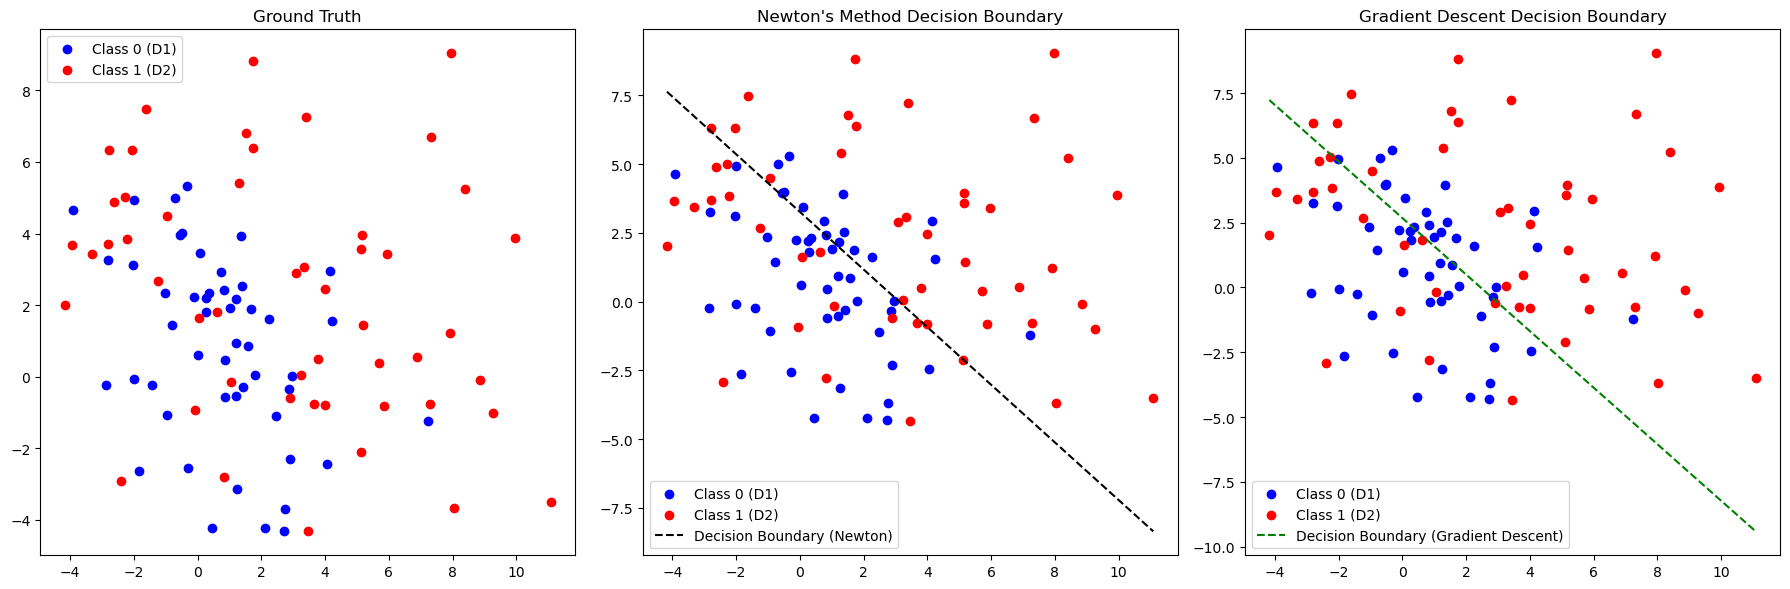

Confusion Matrix (Newton's Method):
 [[32 18]
 [15 35]]
Sensitivity: 0.64 Specificity: 0.7

Confusion Matrix (Gradient Descent):
 [[34 16]
 [20 30]]
Sensitivity: 0.68 Specificity: 0.6

Final Weights using Newton's Method:
θ0 = -0.8969418601
θ1 = 0.2877099856
θ2 = 0.2745739604

Final Weights using Gradient Descent:
θ0 = -0.5915785715
θ1 = 0.2404031187
θ2 = 0.2204707645


In [13]:
logisticRegression(50,1,1,2,2,3,3,4,4)

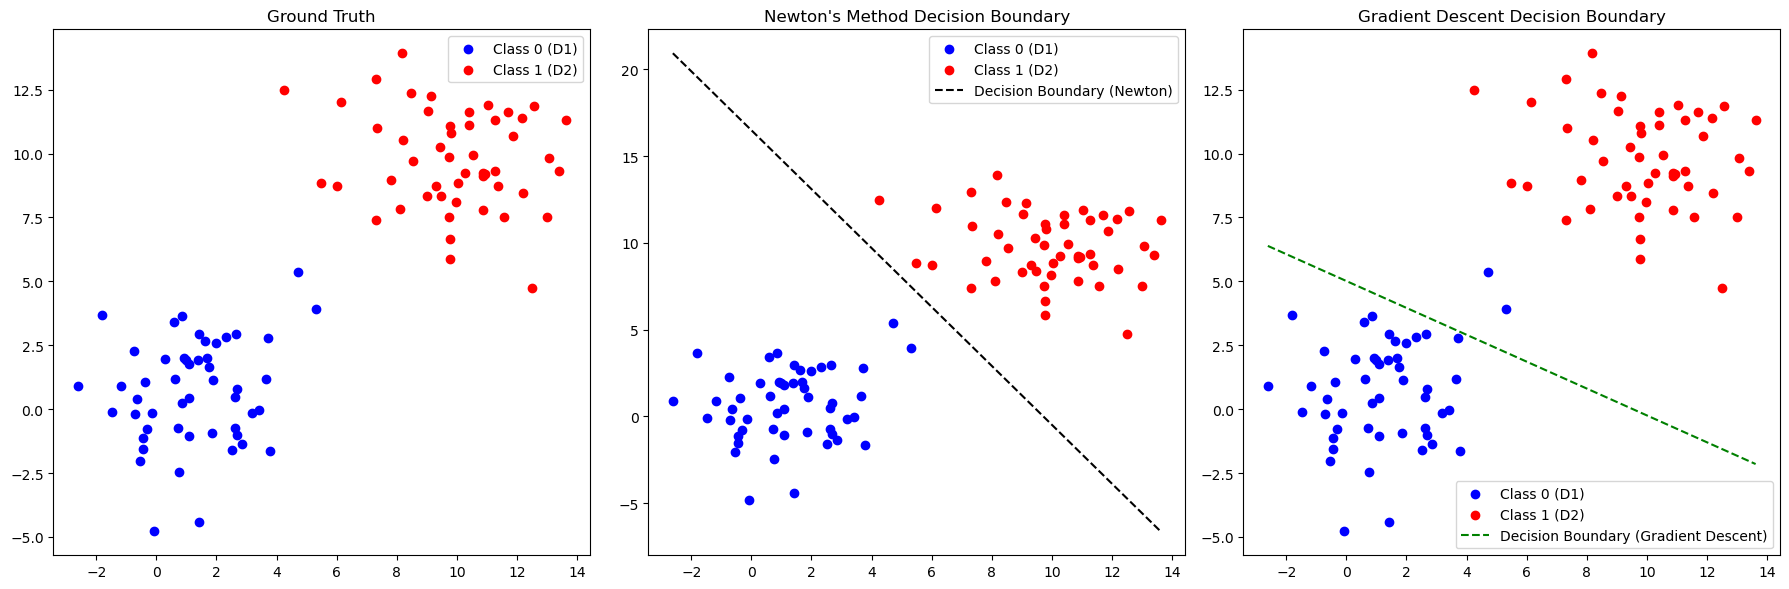

Confusion Matrix (Newton's Method):
 [[50  0]
 [ 0 50]]
Sensitivity: 1.0 Specificity: 1.0

Confusion Matrix (Gradient Descent):
 [[50  0]
 [ 2 48]]
Sensitivity: 1.0 Specificity: 0.96

Final Weights using Newton's Method:
θ0 = -336.6749678788
θ1 = 34.6512773714
θ2 = 20.4183843316

Final Weights using Gradient Descent:
θ0 = -1.5737840998
θ1 = 0.1651572460
θ2 = 0.3140003171


In [14]:
logisticRegression(50,1,1,2,2,10,10,2,2)

# **EM Algorithm**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import random
from sklearn.metrics import confusion_matrix

def parse_mnist_images(filename):
    with open(filename, 'rb') as f:
        # Read the header information
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        # Read the image data
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def parse_mnist_labels(filename):
    with open(filename, 'rb') as f:
        # Read the header information
        magic, num_labels = struct.unpack(">II", f.read(8))
        # Read the label data
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Load the training data
train_images = parse_mnist_images('train-images.idx3-ubyte__')
train_labels = parse_mnist_labels('train-labels.idx1-ubyte__')


# Binning the gray level value into two bins
train_images[train_images < 128] = 0
train_images[train_images >= 128] = 1




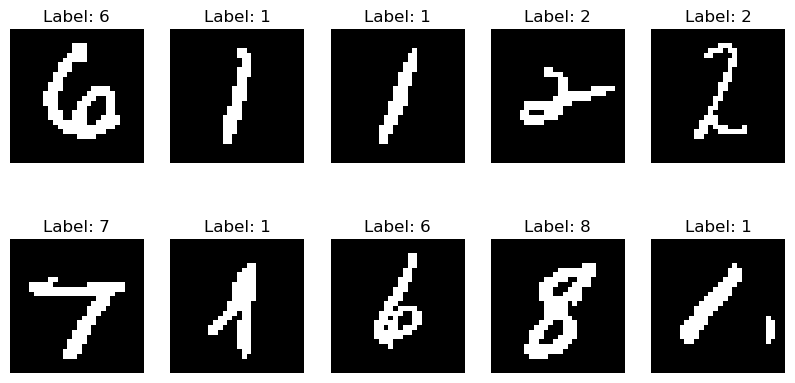

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        idx = random.randint(0, train_images.shape[0])
        axes[i, j].imshow(train_images[idx], cmap='gray')
        axes[i, j].set_title(f"Label: {train_labels[idx]}")
        axes[i, j].axis('off')

plt.show()

In [17]:
import tqdm
def em_algorithm(images, labels, num_clusters=10, max_iter=100, tol=1e-2):
    num_samples, rows, cols = images.shape
    images = images.reshape(num_samples, -1)  # Flatten each image to a vector
    num_pixels = images.shape[1]

    # Initialize Parameters
    np.random.seed(0)
    pi_k = np.ones(num_clusters) / num_clusters
    theta_kj = np.random.rand(num_clusters, num_pixels) 
    gamma = np.zeros((num_samples, num_clusters))

   

    for iteration in tqdm.tqdm(range(max_iter)):
        theta_kj_prev = theta_kj.copy()

        
        # E-step: Calculate responsibilities (using log-probabilities to avoid underflow)
        for k in tqdm.tqdm(range(num_clusters)):
            log_prob_x_given_k = (images * np.log(theta_kj[k] + 1e-10) + (1 - images) * np.log(1 - theta_kj[k] + 1e-10)).sum(axis=1)
            
            gamma[:, k] = np.log(pi_k[k] + 1e-10) + log_prob_x_given_k
      
        
        # Convert from log-sum-exp trick
        gamma = np.exp(gamma - gamma.max(axis=1, keepdims=True))
        gamma /= gamma.sum(axis=1, keepdims=True)

       
        # M-step: Update parameters
        N_k = gamma.sum(axis=0)
        pi_k = N_k / num_samples
        for k in range(num_clusters):
            theta_kj[k] = (gamma[:, k] @ images) / (N_k[k] + 1e-10)



        print(np.sum(np.abs(theta_kj - theta_kj_prev)))
        
        if np.sum(np.abs(theta_kj - theta_kj_prev)) < tol:
            print(f"Converged at iteration {iteration}")
            break

    # Assign clusters based on responsibilities
    cluster_labels = gamma.argmax(axis=1)



    # Map clusters to true labels 
    cluster_to_label_map = {}

    for i in tqdm.tqdm(range(num_clusters)):
        
        mask = (cluster_labels == i)
       
        if np.any(mask):
            assigned_label = np.bincount(labels[mask]).argmax()
            cluster_to_label_map[i] = assigned_label

    predicted_labels = np.vectorize(cluster_to_label_map.get)(cluster_labels)


    # Calculate confusion matrix, sensitivity, and specificity for each digit
    for digit in range(10):
        
        true_positives = np.sum((predicted_labels == digit) & (labels == digit))
        false_positives = np.sum((predicted_labels == digit) & (labels != digit))
        false_negatives = np.sum((predicted_labels != digit) & (labels == digit))
        true_negatives = np.sum((predicted_labels != digit) & (labels != digit))

    
        print(f"\nConfusion Matrix {digit}:")
        print(f" Predict number {digit}\tPredict not number {digit}")
        print(f"Is number {digit}\t {true_positives}\t\t {false_negatives}")
        print(f"Isn't number {digit}\t {false_positives}\t\t {true_negatives}")


        sensitivity = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
        specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) != 0 else 0
        print(f" Sensitivity (Successfully predict number {digit}): {sensitivity:.5f}")
        print(f" Specificity (Successfully predict not number {digit}): {specificity:.5f}")


    
    # Display imagination for each cluster
    print("\nImagination of each cluster as a 28x28 matrix:")
    for cluster_idx in range(num_clusters):
        print(f"\nCluster {cluster_idx} Imagination:")
        
       
        imagination_matrix = (theta_kj[cluster_idx].reshape(28, 28) >= 0.5).astype(int)
        
    
        for row in imagination_matrix:
            print(" ".join(str(pixel) for pixel in row))


    # Compute error rate
    error_rate = np.mean(predicted_labels != labels)
    print(f"\nTotal Error Rate: {error_rate:.2%}")




em_algorithm(train_images, train_labels)

  1%|          | 1/100 [00:08<14:42,  8.91s/it]

3301.014691052699


  2%|▏         | 2/100 [00:19<16:22, 10.02s/it]

327.8060641929129


  3%|▎         | 3/100 [00:33<18:41, 11.56s/it]

182.024107556739


  4%|▍         | 4/100 [00:46<19:27, 12.16s/it]

108.41681974471464


  5%|▌         | 5/100 [00:58<19:06, 12.07s/it]

80.55625751229275


  6%|▌         | 6/100 [01:10<19:15, 12.29s/it]

59.16811040550522


  7%|▋         | 7/100 [01:22<18:52, 12.18s/it]

47.413717017132186


  8%|▊         | 8/100 [01:32<17:40, 11.52s/it]

41.31663425898806


  9%|▉         | 9/100 [01:46<18:18, 12.07s/it]

44.17875832283883


 10%|█         | 10/100 [01:59<18:34, 12.38s/it]

54.30501797639016


 11%|█         | 11/100 [02:11<18:29, 12.46s/it]

49.81126074104852


 12%|█▏        | 12/100 [02:26<19:18, 13.17s/it]

40.596481221171466


 13%|█▎        | 13/100 [02:39<19:05, 13.17s/it]

34.58384942295939


 14%|█▍        | 14/100 [02:52<18:52, 13.17s/it]

32.598381490328855


 15%|█▌        | 15/100 [03:05<18:14, 12.87s/it]

26.71640143466923


 16%|█▌        | 16/100 [03:16<17:27, 12.48s/it]

14.861613884226113


 17%|█▋        | 17/100 [03:31<18:17, 13.22s/it]

10.045393101368237


 18%|█▊        | 18/100 [03:47<19:01, 13.93s/it]

7.382272579201954


 19%|█▉        | 19/100 [03:58<17:45, 13.16s/it]

5.696383997230873


 20%|██        | 20/100 [04:13<18:01, 13.52s/it]

4.767327949066079


 21%|██        | 21/100 [04:27<18:05, 13.75s/it]

4.2767227462592325


 22%|██▏       | 22/100 [04:40<17:32, 13.50s/it]

4.117164590102986


 23%|██▎       | 23/100 [04:54<17:35, 13.70s/it]

4.2905013905237865


 24%|██▍       | 24/100 [05:08<17:40, 13.96s/it]

4.352337922659544


 25%|██▌       | 25/100 [05:20<16:34, 13.26s/it]

4.385840501152584


 26%|██▌       | 26/100 [05:32<16:00, 12.97s/it]

4.009701617559512


 27%|██▋       | 27/100 [05:40<13:52, 11.40s/it]

3.452230338819505


 28%|██▊       | 28/100 [05:47<12:12, 10.18s/it]

3.027551649523521


 29%|██▉       | 29/100 [05:56<11:29,  9.71s/it]

2.6104951396225244


 30%|███       | 30/100 [06:05<10:59,  9.42s/it]

2.3233469722404854


 31%|███       | 31/100 [06:18<11:58, 10.42s/it]

2.1810347841790714


 32%|███▏      | 32/100 [06:27<11:33, 10.21s/it]

2.006488386270357


 33%|███▎      | 33/100 [06:35<10:37,  9.51s/it]

1.8723185362476569


 34%|███▍      | 34/100 [06:45<10:26,  9.49s/it]

1.8114748597668113


 35%|███▌      | 35/100 [06:54<10:21,  9.56s/it]

2.538124750000695


 36%|███▌      | 36/100 [07:05<10:27,  9.81s/it]

17.273368545292634


 37%|███▋      | 37/100 [07:16<10:49, 10.31s/it]

1.8420462048841473


 38%|███▊      | 38/100 [07:27<10:46, 10.44s/it]

0.8923518517969695


 39%|███▉      | 39/100 [12:58<1:48:24, 106.63s/it]

0.8031719333530336


 40%|████      | 40/100 [13:07<1:17:25, 77.43s/it] 

0.7015082590361439


 41%|████      | 41/100 [13:12<54:35, 55.52s/it]  

0.6142661428286763


 42%|████▏     | 42/100 [13:16<38:50, 40.18s/it]

0.5381458858858943


 43%|████▎     | 43/100 [13:20<27:58, 29.44s/it]

0.47673784572471745


 44%|████▍     | 44/100 [13:25<20:27, 21.92s/it]

0.426546883298778


 45%|████▌     | 45/100 [13:29<15:15, 16.65s/it]

0.3861823656188434


 46%|████▌     | 46/100 [13:34<11:40, 12.97s/it]

0.3548879031804557


 47%|████▋     | 47/100 [13:38<09:10, 10.39s/it]

0.32699202665941923


 48%|████▊     | 48/100 [13:42<07:26,  8.58s/it]

0.3180926568164891


 49%|████▉     | 49/100 [13:47<06:13,  7.33s/it]

0.2917453638323816


 50%|█████     | 50/100 [13:51<05:22,  6.44s/it]

0.2658667170989923


 51%|█████     | 51/100 [13:56<04:46,  5.85s/it]

0.24267634027128487


 52%|█████▏    | 52/100 [14:00<04:19,  5.40s/it]

0.2219133376977897


 53%|█████▎    | 53/100 [14:04<03:59,  5.10s/it]

0.20287751010683902


 54%|█████▍    | 54/100 [14:09<03:44,  4.88s/it]

0.18507523821615895


 55%|█████▌    | 55/100 [14:13<03:33,  4.73s/it]

0.16842465575051202


 56%|█████▌    | 56/100 [14:17<03:23,  4.63s/it]

0.1530070867987663


 57%|█████▋    | 57/100 [14:22<03:15,  4.55s/it]

0.13890098833381845


 58%|█████▊    | 58/100 [14:26<03:09,  4.50s/it]

0.12610470761760767


 59%|█████▉    | 59/100 [14:31<03:03,  4.48s/it]

0.11457116159139435


 60%|██████    | 60/100 [14:35<02:58,  4.46s/it]

0.10421045550861077


 61%|██████    | 61/100 [14:39<02:52,  4.43s/it]

0.0948850922985553


 62%|██████▏   | 62/100 [14:44<02:47,  4.41s/it]

0.0864641933146448


 63%|██████▎   | 63/100 [14:48<02:43,  4.43s/it]

0.07880972121619231


 64%|██████▍   | 64/100 [14:53<02:39,  4.43s/it]

0.07181595358418089


 65%|██████▌   | 65/100 [14:57<02:35,  4.43s/it]

0.06540777341667464


 66%|██████▌   | 66/100 [15:01<02:30,  4.43s/it]

0.05954716861001703


 67%|██████▋   | 67/100 [15:06<02:25,  4.41s/it]

0.05422395719665413


 68%|██████▊   | 68/100 [15:10<02:20,  4.40s/it]

0.049399800965792474


 69%|██████▉   | 69/100 [15:15<02:16,  4.41s/it]

0.04503624485464933


 70%|███████   | 70/100 [15:19<02:11,  4.39s/it]

0.04108597586905779


 71%|███████   | 71/100 [15:23<02:06,  4.38s/it]

0.03752032920497601


 72%|███████▏  | 72/100 [15:28<02:02,  4.37s/it]

0.03430184942269933


 73%|███████▎  | 73/100 [15:32<01:58,  4.37s/it]

0.031395122703886134


 74%|███████▍  | 74/100 [15:37<01:54,  4.40s/it]

0.028774841398213444


 75%|███████▌  | 75/100 [15:41<01:50,  4.41s/it]

0.026422215485865104


 76%|███████▌  | 76/100 [15:45<01:46,  4.43s/it]

0.024307878278082853


 77%|███████▋  | 77/100 [15:50<01:41,  4.41s/it]

0.02241968618946605


 78%|███████▊  | 78/100 [15:54<01:37,  4.41s/it]

0.020744344250165175


 79%|███████▉  | 79/100 [15:59<01:32,  4.41s/it]

0.0192795692383532


 80%|████████  | 80/100 [16:03<01:28,  4.43s/it]

0.018014397837167136


 81%|████████  | 81/100 [16:08<01:24,  4.42s/it]

0.01692267370812455


 82%|████████▏ | 82/100 [16:12<01:19,  4.42s/it]

0.015951189548173067


 83%|████████▎ | 83/100 [16:16<01:14,  4.40s/it]

0.015014462868955646


 84%|████████▍ | 84/100 [16:21<01:10,  4.40s/it]

0.0140515516606749


 85%|████████▌ | 85/100 [16:25<01:05,  4.39s/it]

0.013061832003913013


 86%|████████▌ | 86/100 [16:29<01:01,  4.38s/it]

0.01211293412750124


 87%|████████▋ | 87/100 [16:34<00:56,  4.37s/it]

0.011278949054402063


 88%|████████▊ | 88/100 [16:38<00:52,  4.37s/it]

0.010577365533499378


 88%|████████▊ | 88/100 [16:42<02:16, 11.40s/it]


0.00998102855123097
Converged at iteration 88


100%|██████████| 10/10 [00:00<00:00, 3426.44it/s]


Confusion Matrix 0:
 Predict number 0	Predict not number 0
Is number 0	 5317		 606
Isn't number 0	 1183		 52894
 Sensitivity (Successfully predict number 0): 0.89769
 Specificity (Successfully predict not number 0): 0.97812

Confusion Matrix 1:
 Predict number 1	Predict not number 1
Is number 1	 6042		 700
Isn't number 1	 1108		 52150
 Sensitivity (Successfully predict number 1): 0.89617
 Specificity (Successfully predict not number 1): 0.97920

Confusion Matrix 2:
 Predict number 2	Predict not number 2
Is number 2	 4573		 1385
Isn't number 2	 1877		 52165
 Sensitivity (Successfully predict number 2): 0.76754
 Specificity (Successfully predict not number 2): 0.96527

Confusion Matrix 3:
 Predict number 3	Predict not number 3
Is number 3	 4239		 1892
Isn't number 3	 4690		 49179
 Sensitivity (Successfully predict number 3): 0.69140
 Specificity (Successfully predict not number 3): 0.91294

Confusion Matrix 4:
 Predict number 4	Predict not number 4
Is number 4	 2984		 2858
Isn't number 